In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
import pandas as pd


dataset = pd.read_csv("Dataset/iplddataset.csv", encoding='ISO-8859-1')
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
# Last 5 records:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
30696,35.0,Female,0.3,0.1,100.0,12.0,14.0,7.0,4.5,1.4,2
30697,28.0,Male,0.4,0.1,120.0,18.0,20.0,6.8,4.2,1.2,2
30698,45.0,Female,0.2,0.1,110.0,16.0,18.0,7.2,4.3,1.3,2
30699,39.0,Male,0.5,0.2,130.0,20.0,22.0,6.9,4.1,1.1,2
30700,50.0,Female,0.3,0.1,115.0,17.0,19.0,7.1,4.0,1.2,2


In [5]:
# Shape of dataset:
dataset.shape

(30701, 11)

In [6]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

Age                             2
Gender                        902
Total_Bilirubin               648
Direct_Bilirubin              561
Alkaline_Phosphotase          796
Alamine_Aminotransferase      538
Aspartate_Aminotransferase    462
Total_Protiens                463
Albumin                       494
Albumin_and_Globulin_Ratio    559
Dataset                         0
dtype: int64

In [7]:
# Label Encoding
dataset['Gender'] = np.where(dataset['Gender']=='Male', 1,0)

In [8]:
# Filling NaN Values of  features with Median :
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].median())
dataset['Total_Bilirubin'] = dataset['Total_Bilirubin'].fillna(dataset['Total_Bilirubin'].median())
dataset['Direct_Bilirubin'] = dataset['Direct_Bilirubin'].fillna(dataset['Direct_Bilirubin'].median())
dataset['Alkaline_Phosphotase'] = dataset['Alkaline_Phosphotase'].fillna(dataset['Alkaline_Phosphotase'].median())
dataset['Alamine_Aminotransferase'] = dataset['Alamine_Aminotransferase'].fillna(dataset['Alamine_Aminotransferase'].median())
dataset['Aspartate_Aminotransferase'] = dataset['Aspartate_Aminotransferase'].fillna(dataset['Aspartate_Aminotransferase'].median())
dataset['Total_Protiens'] = dataset['Total_Protiens'].fillna(dataset['Total_Protiens'].median())
dataset['Albumin'] = dataset['Albumin'].fillna(dataset['Albumin'].median())

In [9]:
# Datatypes:
dataset.dtypes

Age                           float64
Gender                          int32
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

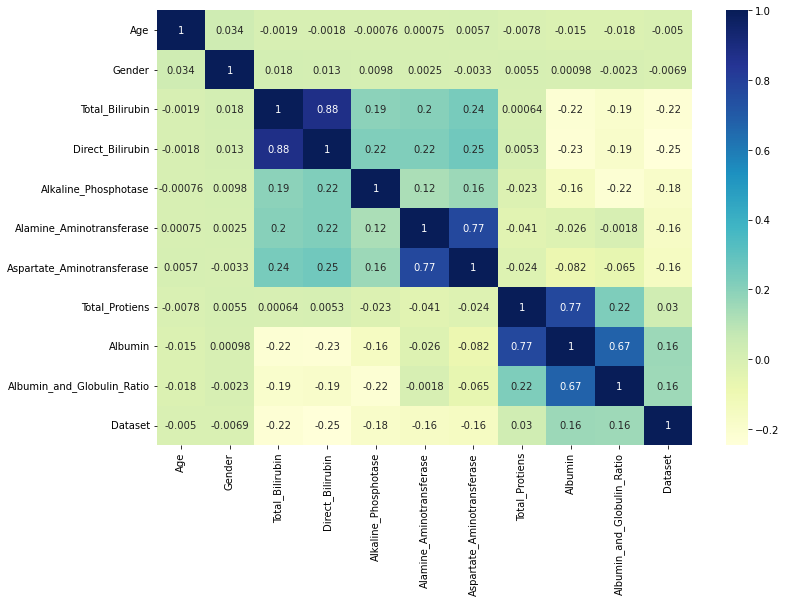

In [10]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [11]:
# Usually we drop that feature which has above 0.85% multicollinearity between two independent feature.
# Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them
# Droping 'Direct_Bilirubin' feature:
dataset = dataset.drop('Direct_Bilirubin', axis=1)

In [12]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [13]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [14]:
# top 5 records of Independent features:
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65.0,0,0.7,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,1,10.9,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,1,7.3,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1,1.0,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,1,3.9,195.0,27.0,59.0,7.3,2.4,0.40


In [15]:
# top 5 records of dependent features:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

Liver Disease Patients      : 21917
Non Liver Disease Patients  : 8784


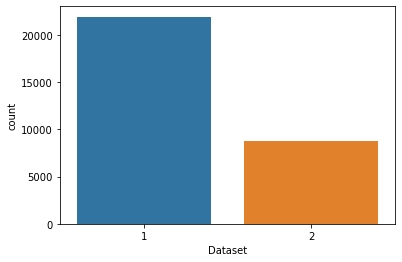

In [16]:
# Target feature:
print("Liver Disease Patients      :", dataset['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", dataset['Dataset'].value_counts()[2])

# Visualization:
sns.countplot(x=dataset['Dataset'])
plt.show()

In [17]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

Before SMOTE :  Counter({1: 21917, 2: 8784})
After SMOTE  :  Counter({1: 21889, 2: 21889})


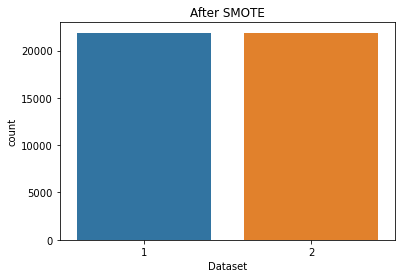

In [18]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

sns.countplot(x=y_smote)
plt.title('After SMOTE')
plt.show()


In [19]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

In [20]:
print(X_train.shape)
print(X_test.shape)

(30644, 9)
(13134, 9)


In [21]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train, y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 99.74%
[[6483   15]
 [  19 6617]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6498
           2       1.00      1.00      1.00      6636

    accuracy                           1.00     13134
   macro avg       1.00      1.00      1.00     13134
weighted avg       1.00      1.00      1.00     13134



In [23]:
# Creating a pickle file for the trained RandomForest model
import pickle
import os

with open("Liver80.pkl", "wb") as file:
    pickle.dump(RandomForest, file)
print(f"Model saved as {file}")


Model saved as <_io.BufferedWriter name='Liver80.pkl'>


In [24]:
# Load the saved model
import pickle
model_path = "Liver80.pkl"  
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Predict on the test data
y_pred = loaded_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 99.74%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      6498
           2       1.00      1.00      1.00      6636

    accuracy                           1.00     13134
   macro avg       1.00      1.00      1.00     13134
weighted avg       1.00      1.00      1.00     13134



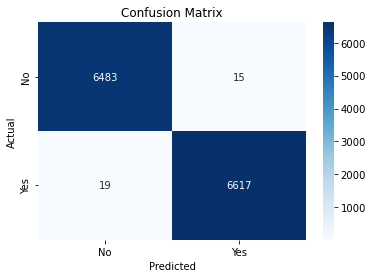

In [25]:
cm = confusion_matrix(y_test, loaded_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix'); plt.show()


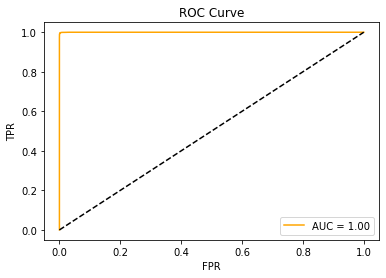

In [26]:
from sklearn.metrics import roc_curve, auc

# Convert 1→0, 2→1
y_test_bin = np.where(y_test == 1, 0, 1)

y_prob = loaded_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve')
plt.legend(); plt.show()


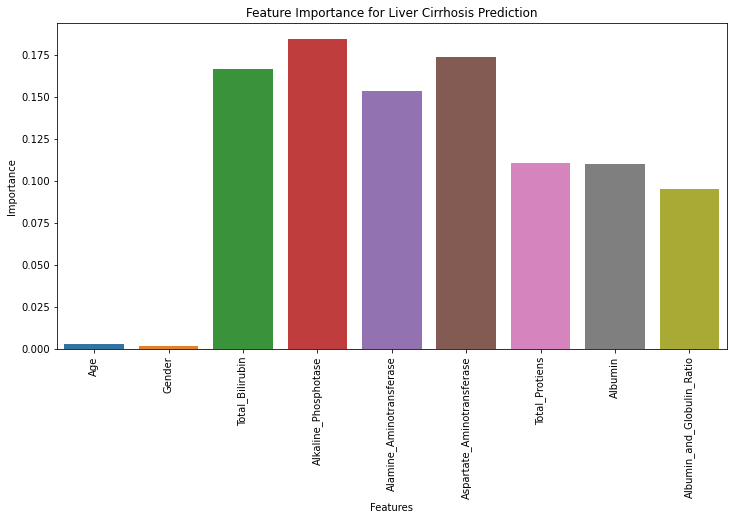

In [27]:
# Feature Importance
feature_importances = RandomForest.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=X_test.columns, y=feature_importances)
plt.title('Feature Importance for Liver Cirrhosis Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

